<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Naive%20Bayes%20in%20medical%20cases/DiabetesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown 1M5fXNjce5s2hgI9tSL9SVOMTl8Jf-dcV
#https://drive.google.com/file/d/1M5fXNjce5s2hgI9tSL9SVOMTl8Jf-dcV/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1M5fXNjce5s2hgI9tSL9SVOMTl8Jf-dcV
To: /content/Naive-Bayes-Classification-Data.csv
100% 8.99k/8.99k [00:00<00:00, 27.7MB/s]


#Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading Dataset

In [5]:
df=pd.read_csv('/content/Naive-Bayes-Classification-Data.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


#Size of features

In [21]:
columns_to_check = [col for col in df.columns if col != 'diabetes']

for column in columns_to_check:
    column_size = df[column].size
    print(f"Size of column '{column}': {column_size}")

Size of column 'glucose': 995
Size of column 'bloodpressure': 995


#sns pairplot

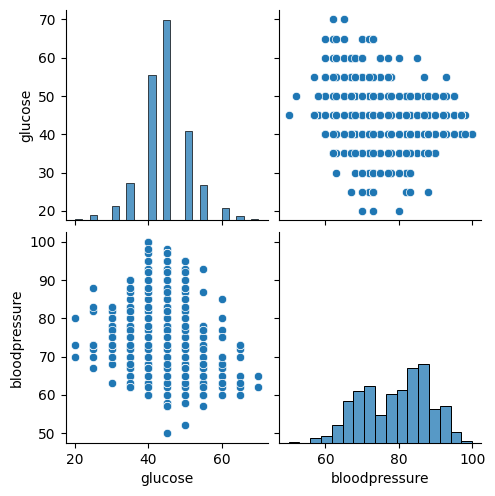

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_for_pairplot = [col for col in df.columns if col != 'diabetes']
sns.pairplot(df[columns_for_pairplot])
plt.show()

array([[<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bloodpressure'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

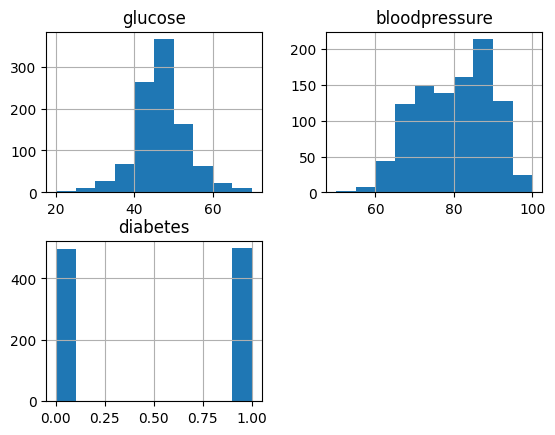

In [23]:
df.hist()

#Correlation

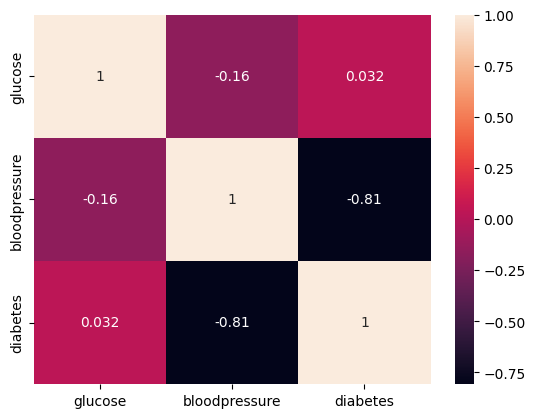

In [24]:
cor=df.corr()
fig, ax = plt.subplots()
ax = sns.heatmap(cor, annot=True)

#Splitting Data

In [27]:
X=np.array(df.loc[:,df.columns!='diabetes'])
y=np.array(df.loc[:,df.columns=='diabetes'])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('train:',X_train.shape, y_train.shape,'\ntest: ', X_test.shape, y_test.shape)

train: (796, 2) (796, 1) 
test:  (199, 2) (199, 1)


#Scaling Data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
print(X_train[:5])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5])

[[45 73]
 [45 60]
 [40 87]
 [55 60]
 [45 73]]
[[ 0.09485969 -0.68680808]
 [ 0.09485969 -2.07708392]
 [-0.65274735  0.81041204]
 [ 1.59007376 -2.07708392]
 [ 0.09485969 -0.68680808]]


In [30]:
print(y_train.shape)
print(y_train.ravel().shape)

(796, 1)
(796,)


#Naive Bayes classifier

##From Scratch

In [31]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


##scikit library

In [32]:
from sklearn.naive_bayes import GaussianNB
MyNB = NaiveBayes()
SKNB=GaussianNB()

MyNB.fit(X_train, y_train.ravel())
SKNB.fit(X_train,y_train.ravel())
pred = MyNB.predict(X_test)
pred2 = SKNB.predict(X_test)

#Evaluation

In [33]:
print(pred)
print(pred2)


[1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 1]
[1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 1]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        88
           1       0.94      0.89      0.92       111

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        88
           1       0.94      0.89      0.92       111

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



##Confusion Matrix

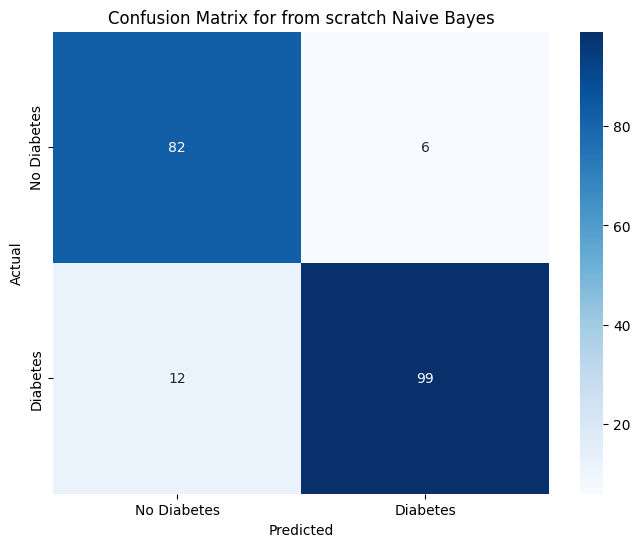

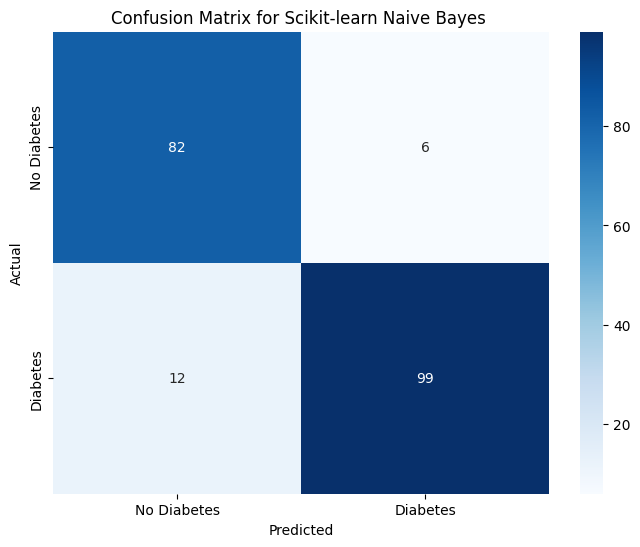

In [41]:

from sklearn.metrics import confusion_matrix

cm_MyNB = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_MyNB, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix for from scratch Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_SKNB = confusion_matrix(y_test, pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_SKNB, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix for Scikit-learn Naive Bayes ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Covariance

In [50]:
classes = np.unique(y_train)
for c in classes:
    X_c = X_train[y_train.ravel() == c]
    covariance_matrix = np.cov(X_c, rowvar=False)
    print(f"Covariance matrix for class {c}:\n{covariance_matrix}\n")


Covariance matrix for class 0:
[[ 0.29318386 -0.02176563]
 [-0.02176563  0.23855657]]

Covariance matrix for class 1:
[[ 1.74989563 -0.24771503]
 [-0.24771503  0.4271948 ]]



#Decision Surface

<ipython-input-46-a360c26d2e97>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


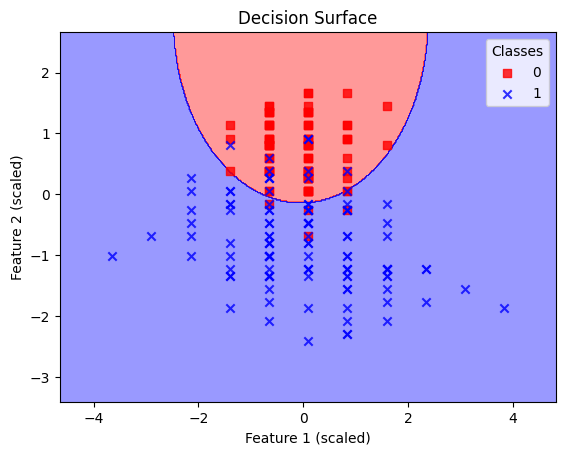

In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

X_test_reduced = X_test[:, :2]
plot_decision_regions(X_test_reduced, y_test.ravel(), SKNB)
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Decision Surface')
plt.legend(title='Classes', loc='best')
plt.show()
